In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# import Requirement

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기
%matplotlib inline

# 간단한 EDA

In [ ]:
path = '/content/drive/MyDrive/data/programmers_ai/yujatea/comp_2/'

In [ ]:
all_zero_submission = pd.read_csv(os.path.join(path, 'all_zero_submission.csv'))
random_submission = pd.read_csv(os.path.join(path, 'random_submission.csv'))

In [ ]:
all_zero_submission.head()

ID  label
0   0      0
1   1      0
2   2      0
3   3      0
4   4      0

In [ ]:
random_submission.head()

ID  label
0   0      4
1   1      0
2   2      6
3   3      0
4   4      4

In [ ]:
print(all_zero_submission.info())
print(random_submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13491 entries, 0 to 13490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      13491 non-null  int64
 1   label   13491 non-null  int64
dtypes: int64(2)
memory usage: 210.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13491 entries, 0 to 13490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      13491 non-null  int64
 1   label   13491 non-null  int64
dtypes: int64(2)
memory usage: 210.9 KB
None


In [ ]:
train = pd.read_csv(os.path.join(path, 'train.csv'))
test = pd.read_csv(os.path.join(path, 'test.csv'))

In [ ]:
train.head()

ID                                  text  label
0   0                          유소영비호감 성형아줌마      1
1   1                               나오지마라 썅      3
2   2  식상하고 지긋지긋했는데 잘 끝나네 오예 소리벗고 빤스질러~~!!!      6
3   3                    성희롱 당할 얼굴이 아닌데?ㅋㅋㅋ      5
4   4             "끝까지 해보자~쪽파리 원숭이 자한 쓰레기당"      0

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65863 entries, 0 to 65862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      65863 non-null  int64 
 1   text    65863 non-null  object
 2   label   65863 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [ ]:
train['label'].value_counts()

6    24900
3     8895
2     8481
0     8463
1     7107
4     4118
5     3899
Name: label, dtype: int64

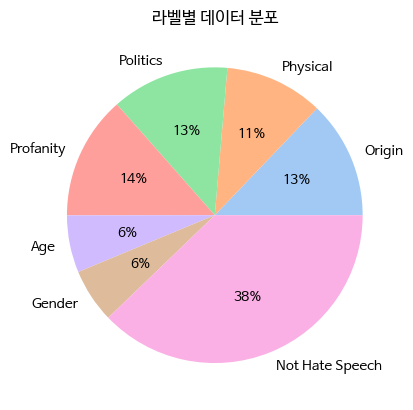

In [ ]:
data = list(train.groupby('label').count()['ID'])

colors = sns.color_palette('pastel')[0:7]
labels = ['Origin', 'Physical','Politics', 'Profanity', 'Age', 'Gender', 'Not Hate Speech']
plt.title('라벨별 데이터 분포')
plt.pie(x=data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Data Preprocessing

## 1.  Tokenizer

* soynlp 토크나이저 사용
  * 이유
    * 문장간 띄워쓰기 불분명 해보임.(대체로 리뷰성 글들의 특징같음)
    * 신조어가 섞여 있음.

  * https://github.com/lovit/soynlp


In [ ]:
# mecab 설치 => 형태소 분석기 = 토큰화
# Colab에 Mecab 설치
# !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
# %cd Mecab-ko-for-Google-Colab
# !bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 122 (delta 15), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (122/122), 1.27 MiB | 17.14 MiB/s, done.
Resolving deltas: 100% (54/54), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 23.1 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-04-25 20:42:12--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.0, 18.205.93.1, ...
Connecting to 

In [ ]:
# from torchtext import data # torchtext.data 임포트
# from konlpy.tag import Mecab

In [ ]:
max_length = 0
for row in train.iterrows():
 max_length = max(len(row[1][1]), max_length)

In [ ]:
print(max_length)

306


In [40]:
import re

In [41]:
# 특수기호와 "ㅋ" 제거를 위한 정규표현식
pattern1 = '[^\w\s]'
pattern2 = 'ㅋ+'
combined_pattern = '|'.join([pattern1, pattern2])

In [42]:
# applymap() 메서드를 사용하여 정규표현식 적용
def clean_text(s):
    s = re.sub(combined_pattern, '', s)
    return s

In [45]:
train['text'] = train['text'].map(clean_text)

In [46]:
train.head()

ID                             text  label
0   0                     유소영비호감 성형아줌마      1
1   1                          나오지마라 썅      3
2   2  식상하고 지긋지긋했는데 잘 끝나네 오예 소리벗고 빤스질러      6
3   3                   성희롱 당할 얼굴이 아닌데      5
4   4           끝까지 해보자쪽파리 원숭이 자한 쓰레기당      0

In [49]:
train.to_csv(index=False)

'ID,text,label\n0,유소영비호감 성형아줌마,1\n1,나오지마라 썅,3\n2,식상하고 지긋지긋했는데 잘 끝나네 오예 소리벗고 빤스질러,6\n3,성희롱 당할 얼굴이 아닌데,5\n4,끝까지 해보자쪽파리 원숭이 자한 쓰레기당,0\n5,그냥 이쁘다 해주면되지 악플들은 진짜 으휴 대부분 다 여자겠지,5\n6,어우 지겨워 성형한 애 기사 좀 그만 올려라ㅉㅉ,1\n7,버핏은 틀딱이라 새로운걸 못받아들여서 그렇지,4\n8,전라도가 일본 인 선조잖아요 진짜 토착 왜구죠,0\n9,못 생기고 못난 것들은 혼자 살아라 너덜은 쳐다보지도 않는다,1\n10,우리북조선칭구들과 좌빨들,2\n11,저런 니미 봉다리를 거시기 혀벌고 싶다,3\n12,꼰대들 다 모였구만,4\n13, 틀딱쩝쩝이들 쌍팔년도식 빨갱이팔이 안하냐,2\n14,얼른 니 같은 사나이한테 시집 가가 떡두꺼비 같은 아들래미 다섯 명 낳아가 만회해라,6\n15,남자나이많고 여자어리면 뭐라안하면서 여자가 나이가 많으면 뭔 비난이 많은지ㅡㅡ나이가 뭔 대수라고ㅡ 행복하면 되는게지,6\n16,간신 호동이 넌 졸라 간신쎅히아 왕이되고싶은 간신쎅히캬악 퉤퉤 퉤퉤,3\n17,오늘 아형 씹노잼,3\n18,문과들 어떻게든 쉴드치네 적폐과목 생윤사 ,0\n19,암컷들은 거시기가 잘팔려야됨,5\n20,남자는 태어나면 바로 거세해라 그래야 성범죄 없어지지,5\n21,재수없다 짱깨새끼들,0\n22,노사연씨가 라디오를 하시면 사연이 안오나요,6\n23,문재인 갱상도 출신 이거던 이 호로 문닝 이 합바지 돼지감자,0\n24,그래서 625는 남침이래 북침이래 주적이 누구래 일본,6\n25,조또 빨갱이쉐끼 뒤져라 너같은놈 살면뭐하냐,2\n26,노태우야 말로 진짜 서민대통령입니다 전국의 집값이 폭등할 조짐을 보이자 주택 3만5천호를 지어 집값을 바로 잡아버렸고 전두환시절의 경제관료들의 계획을 그대로 수렴해 국가가 직접물가를 잡아주어 소득은 오르는데 물가가 오르지않아 취약계층과 저소득층이 살기어렵지않았습니다 그리고 올림픽성공개최와 경제성장이 가파른데도

In [50]:
# Py-Hanspell을 통한 띄워쓰기 보정 => 안된다. 퉤
!pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-scf3b6g7
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-scf3b6g7
  Resolved https://github.com/ssut/py-hanspell.git to commit 8e993cf46f97f9d665c15633a0fc78ac1b727713
  Preparing metadata (setup.py) ... done
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4865 sha256=fac9fe6bff15df42cd5ce0db6a5281acba8c54dceeb7d9de752827d159921bbd
  Stored in directory: /tmp/pip-ephem-wheel-cache-_fz6kpyq/wheels/94/bc/ef/2cb90c305d609f8086489e7e1bd69f21e955118f26938609b7
Successfully built py-hanspell


In [51]:
train.head()

ID                             text  label
0   0                     유소영비호감 성형아줌마      1
1   1                          나오지마라 썅      3
2   2  식상하고 지긋지긋했는데 잘 끝나네 오예 소리벗고 빤스질러      6
3   3                   성희롱 당할 얼굴이 아닌데      5
4   4           끝까지 해보자쪽파리 원숭이 자한 쓰레기당      0

In [52]:
# from hanspell import spell_checker

# def apply_spacing(s):
#   spelled_sent = spell_checker.check(s)
#   hanspell_sent = spelled_sent.checked
#   return hanspell_sent

In [53]:
# train['text'] = train['text'].map(apply_spacing)

JSONDecodeError: ignored

In [54]:
# sent = "유소영비호감 성형아줌마"
# spelled_sent = spell_checker.check(sent)

# hanspell_sent = spelled_sent.checked
# print(hanspell_sent)


JSONDecodeError: ignored

In [56]:
pip install git+https://github.com/haven-jeon/PyKoSpacing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-2pvinwfd
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-2pvinwfd
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit a058e90c9de41889c63bf2ee454bf1de064d70ff
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB

In [64]:
from pykospacing import Spacing
# pycospacing으로 띄워쓰기 처리
def apply_pycospacing(s):
  spacing = Spacing()
  s.replace(" ", "")
  kospacing_sent = spacing(s) 
  return kospacing_sent


In [65]:
train['text'] = train['text'].map(apply_pycospacing)

KeyboardInterrupt: ignored